[3.20000e+01 1.60000e+01 8.00000e+00 4.00000e+00 2.00000e+00 1.00000e+00
 5.00000e-01 2.50000e-01 1.25000e-01 6.25000e-02 3.12500e-02 1.56250e-02
 7.81250e-03 3.90625e-03]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

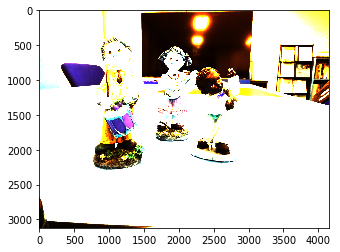

In [3]:
# import the necessary packages
from __future__ import print_function
import cv2 as cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

list = open("list.txt")
images = []
times = []

# Load each image in the list
# Allocate an exposure time in seconds to each image
for line in list:
    imagePath = line.split()[0]
    image = cv2.imread(imagePath)
    images.append(image)
    time = line.split()[1]
    times.append(float(1.0/float(time)))
    
# Convert python arrays to numpy arrays
# The times array seem to require setting dtype, otherwise we get NAN in each array entry
npImages = np.array(images)
npTimes = np.array(times,dtype=np.float32)

print(npTimes)

images,times = npImages, npTimes

# Convert images to HDR
calibrate = cv2.createCalibrateDebevec()
response = calibrate.process(images, times)
merge_debevec = cv2.createMergeDebevec()
hdr = merge_debevec.process(images,times,response)

# Show the HDR
plt.imshow(hdr)

# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.3, 0.7)
ldrDrago = tonemapDrago.process(hdr)
ldrDrago = 3 * ldrDrago
cv2.imwrite("Figure-Drago.jpg", ldrDrago * 255)

# Tonemap using Durand's method obtain 24-bit color image
tonemapDurand = cv2.createTonemapDurand(1.5,3.5,0.7,0.4,1.1)
ldrDurand = tonemapDurand.process(hdr)
ldrDurand = 3 * ldrDurand
cv2.imwrite("Figure-Durand.jpg", ldrDurand * 255)

# Tonemap using Mantiuk's method to obtain 24-bit color image
tonemapMantiuk = cv2.createTonemapMantiuk(1.8,0.7, 0.7)
ldrMantiuk = tonemapMantiuk.process(hdr)
ldrMantiuk = 3 * ldrMantiuk
cv2.imwrite("Figure-Mantiuk.jpg", ldrMantiuk * 255)

# Tonemap using Reinhard's method to obtain 24-bit color image
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0.9,0.9,0.5)
ldrReinhard = tonemapReinhard.process(hdr)
cv2.imwrite("Figure-Reinhard.jpg", ldrReinhard * 255)